<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Packages

In [55]:
!apt-get -qq install -y graphviz && pip install pydot

# Mounting Google Drive

In [56]:
#import data (test CSV)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Decision Tree Classification**

# Importing the libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import six
import sys
import seaborn as sns
from sklearn import tree
from IPython.display import Image 
import pydotplus
from six import StringIO

# Importing the dataset

In [58]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/golf-dataset.csv')
dataset

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


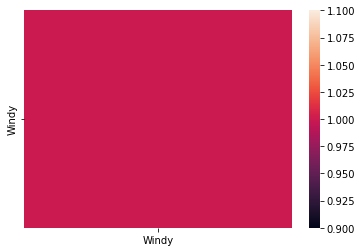

In [80]:
# Calculating the correlation matrix
corr = dataset.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

In [81]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [82]:
X

array([['Rainy', 'Hot', 'High', False],
       ['Rainy', 'Hot', 'High', True],
       ['Overcast', 'Hot', 'High', False],
       ['Sunny', 'Mild', 'High', False],
       ['Sunny', 'Cool', 'Normal', False],
       ['Sunny', 'Cool', 'Normal', True],
       ['Overcast', 'Cool', 'Normal', True],
       ['Rainy', 'Mild', 'High', False],
       ['Rainy', 'Cool', 'Normal', False],
       ['Sunny', 'Mild', 'Normal', False],
       ['Rainy', 'Mild', 'Normal', True],
       ['Overcast', 'Mild', 'High', True],
       ['Overcast', 'Hot', 'Normal', False],
       ['Sunny', 'Mild', 'High', True]], dtype=object)

# Taking care of missing data

In [83]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

# Encoding categorical data

## Encoding the Independent Variable


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [85]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [86]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [87]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [88]:
X

array([[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]], dtype=object)

## Encoding the Dependent Variable

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into the Training set and Test set

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
X_train

array([[-1.09544512,  1.09544512,  0.75592895, -0.75592895,  1.63299316,
        -0.75592895, -0.75592895, -0.31622777, -0.75592895,  0.91287093],
       [ 0.91287093, -0.91287093,  0.75592895, -0.75592895,  1.63299316,
        -0.75592895, -0.75592895, -0.31622777,  1.32287566, -1.09544512],
       [-1.09544512,  1.09544512,  0.75592895, -0.75592895, -0.61237244,
        -0.75592895,  1.32287566, -0.31622777, -0.75592895,  0.91287093],
       [ 0.91287093, -0.91287093, -1.32287566,  1.32287566, -0.61237244,
        -0.75592895,  1.32287566, -0.31622777, -0.75592895,  0.91287093],
       [-1.09544512,  1.09544512,  0.75592895, -0.75592895, -0.61237244,
         1.32287566, -0.75592895, -0.31622777,  1.32287566, -1.09544512],
       [ 0.91287093, -0.91287093,  0.75592895, -0.75592895, -0.61237244,
         1.32287566, -0.75592895, -0.31622777, -0.75592895,  0.91287093],
       [-1.09544512,  1.09544512, -1.32287566,  1.32287566, -0.61237244,
         1.32287566, -0.75592895, -0.31622777

# Fitting Decision Tree Classification to the Training set

In [93]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting the Test set results

In [94]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0])

# Making the Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0]
 [2 1]]


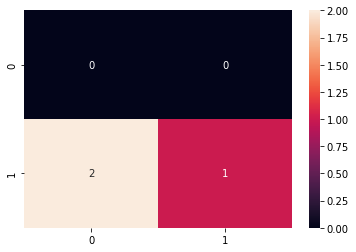

In [96]:
sns.heatmap(cm, annot=True)

# Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
sys.modules['sklearn.externals.six'] = six

dot_data = StringIO()

data=tree.export_graphviz(classifier,
                          out_file = None,
                          filled = True, rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [ ]:
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())